<a href="https://colab.research.google.com/github/5h33p/student_habits/blob/main/Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [1]:
# Basic Libraries
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, f_classif, VarianceThreshold

# Model Training and Testing
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

# Pipeline Creation
from sklearn.pipeline import Pipeline

# Getting Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("aryan208/student-habits-and-academic-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-habits-and-academic-performance-dataset


In [3]:
data = pd.read_csv(path + "/enhanced_student_habits_performance_dataset/enhanced_student_habits_performance_dataset.csv")
data.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [4]:
# data[data.notna()==False].sum() # There are no null values

print(data.columns)

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')


# Exploratory Analysis

## Anxiety Score

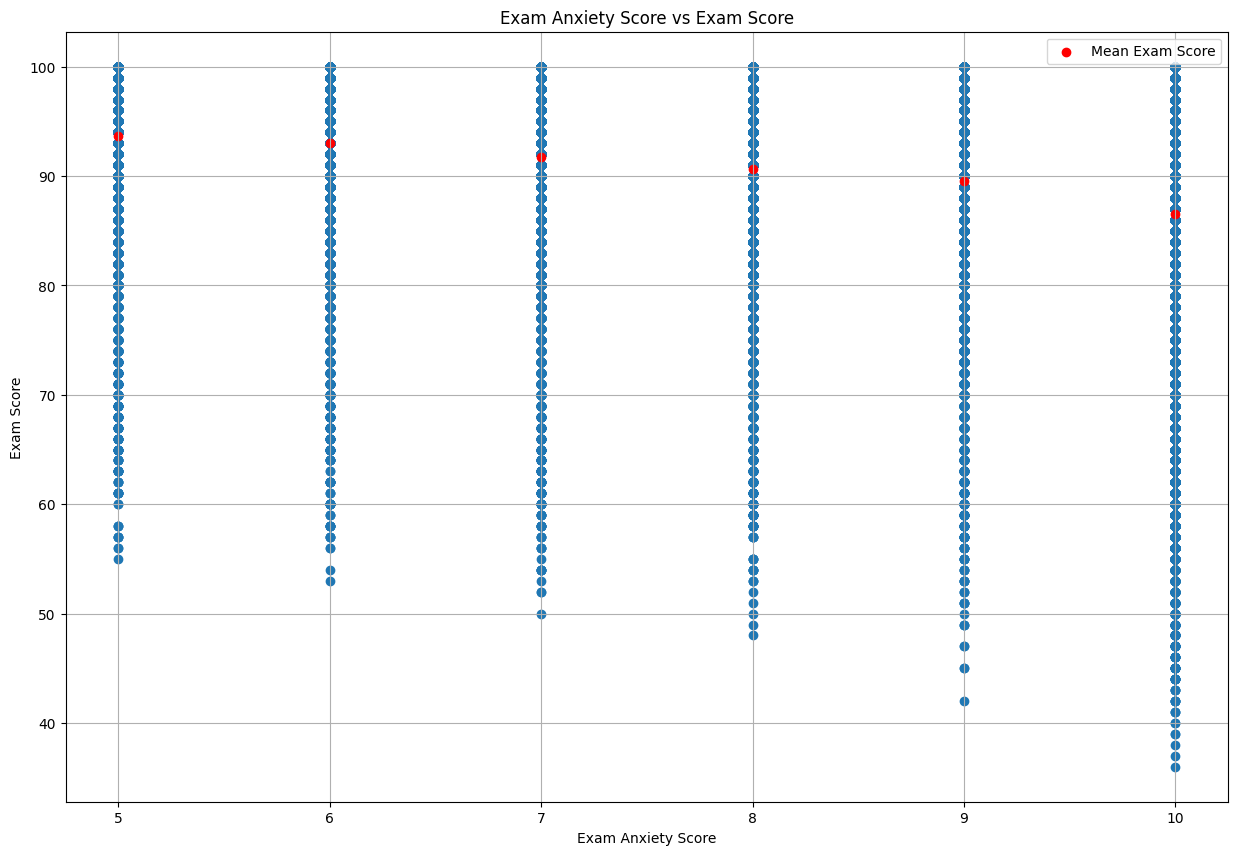

In [5]:
plt.figure(figsize=(15, 10))
plt.scatter(data.exam_anxiety_score, data.exam_score)
plt.title("Exam Anxiety Score vs Exam Score")

score_anxiety = data.groupby(by='exam_anxiety_score').exam_score.mean().copy()

plt.scatter(score_anxiety.index, score_anxiety, marker='o', color='r', label='Mean Exam Score')
plt.grid(True)
plt.legend()
plt.xlabel("Exam Anxiety Score")
plt.ylabel("Exam Score")
plt.show()

## Stress Level

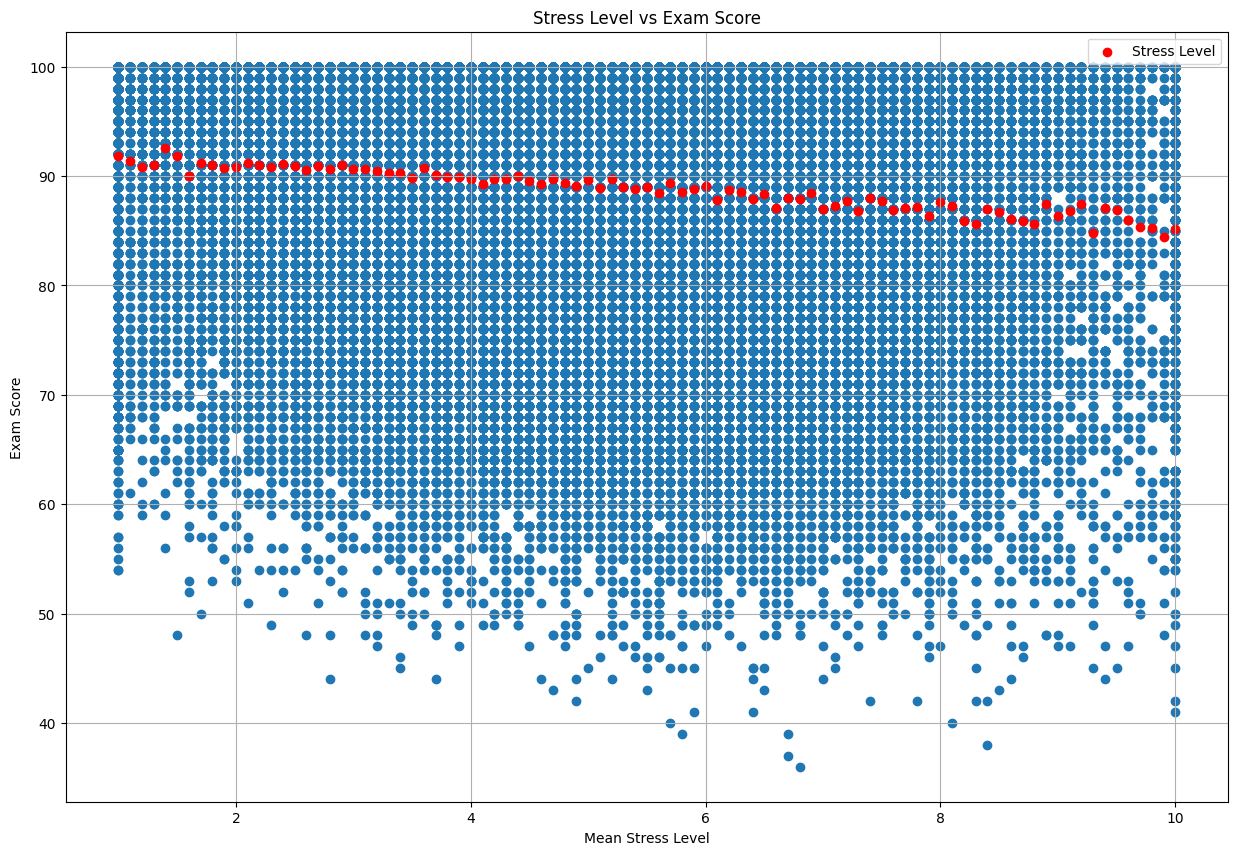

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(data.stress_level, data.exam_score)
plt.title("Stress Level vs Exam Score")

stress_level = data.groupby(by='stress_level').exam_score.mean().copy()

plt.scatter(stress_level.index, stress_level, marker='o', color='r', label='Stress Level')
plt.grid(True)
plt.legend()
plt.xlabel("Mean Stress Level")
plt.ylabel("Exam Score")
plt.show()

## Sleep Hours

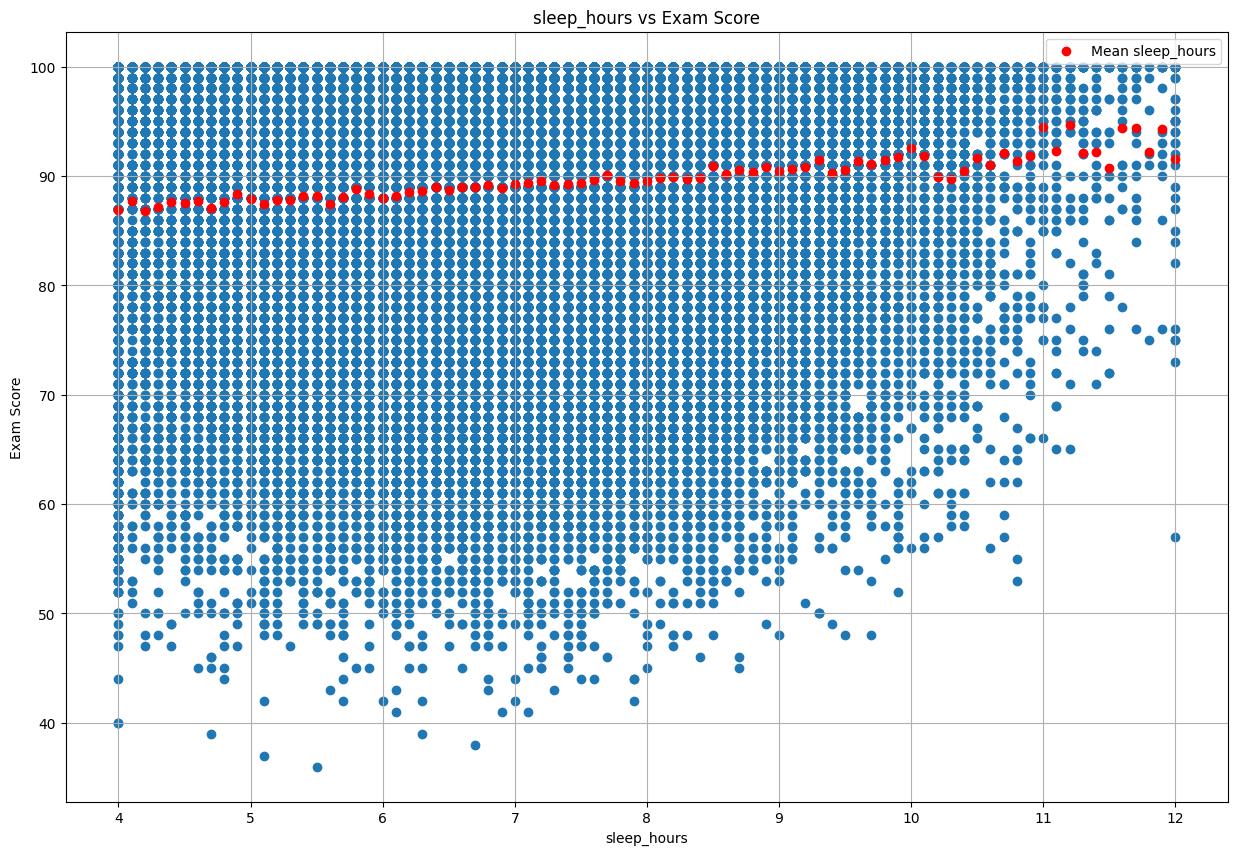

In [7]:
df_column = 'sleep_hours'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Screen Time

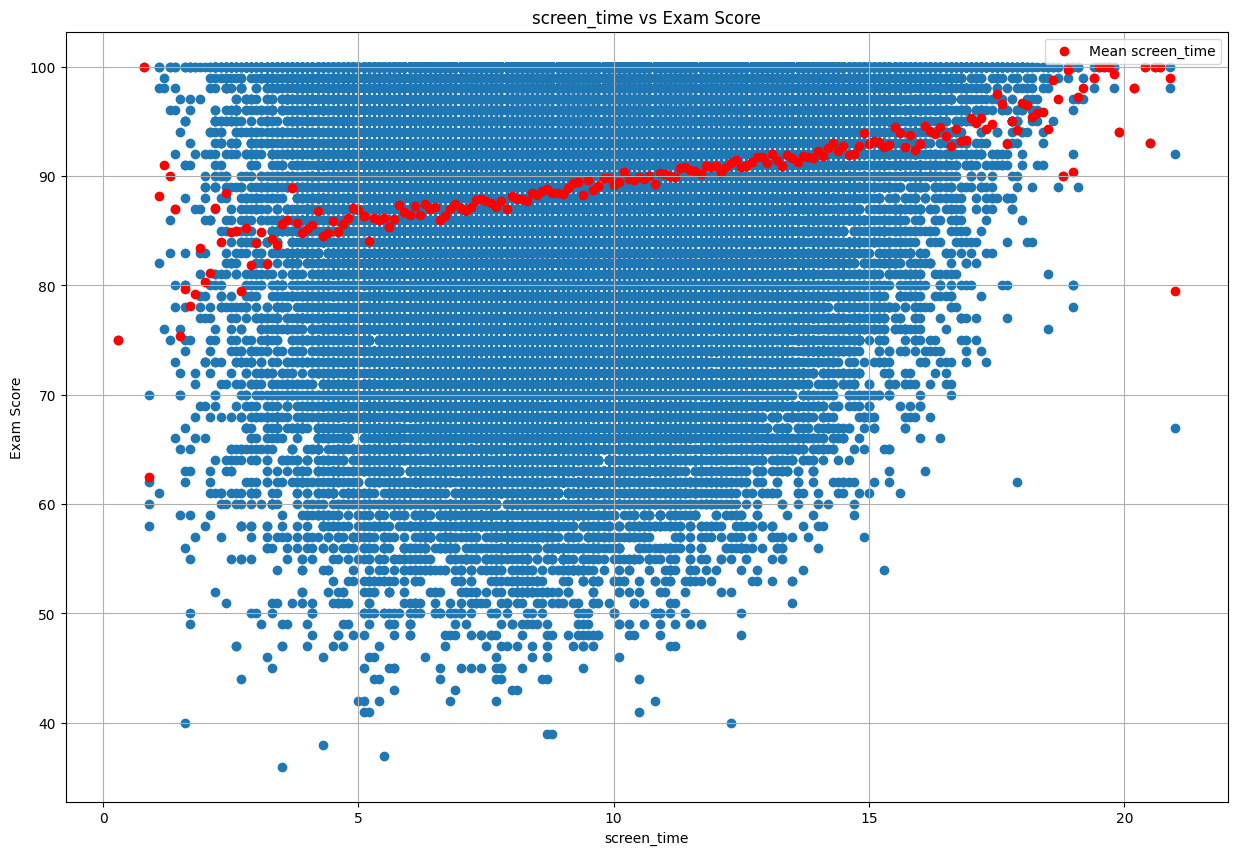

In [8]:
df_column = 'screen_time'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Motivation Level

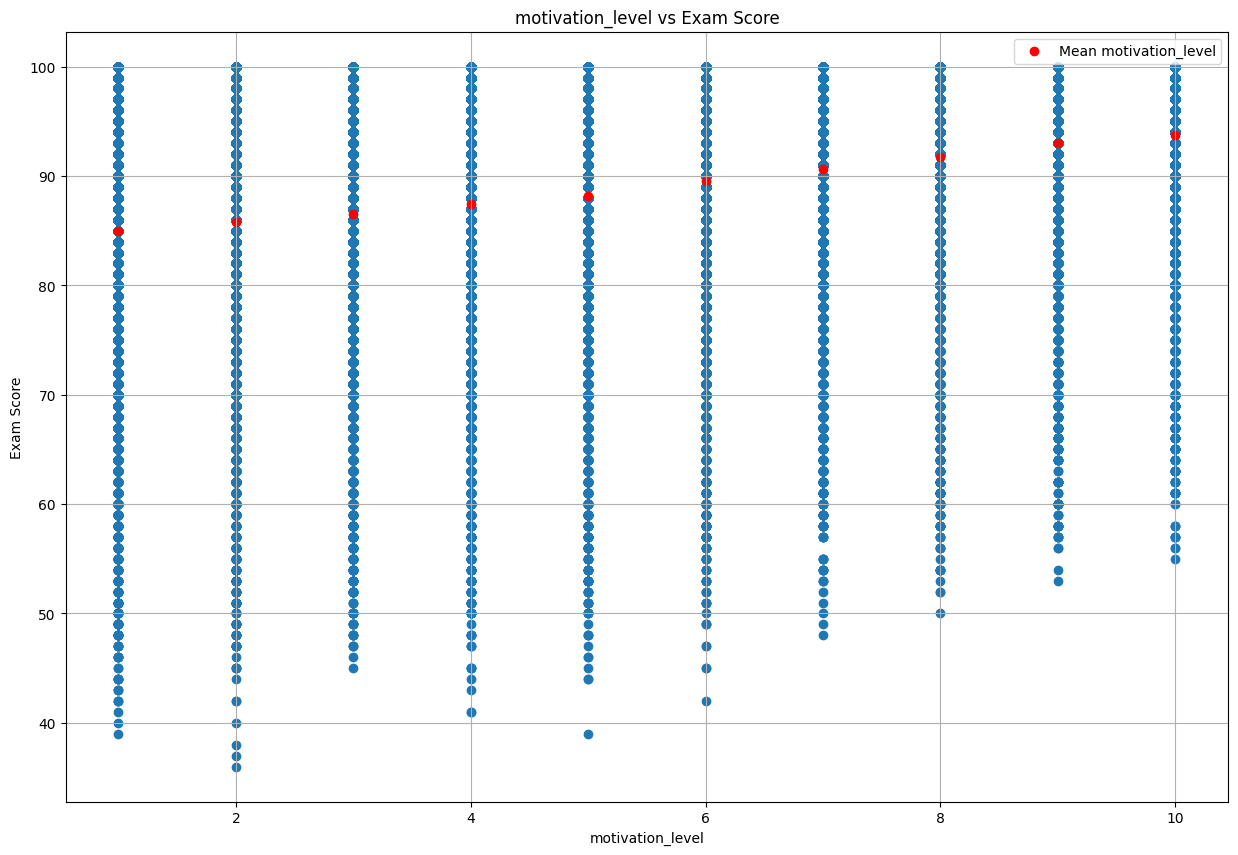

In [9]:
df_column = 'motivation_level'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Cutted Study Hours Per Day

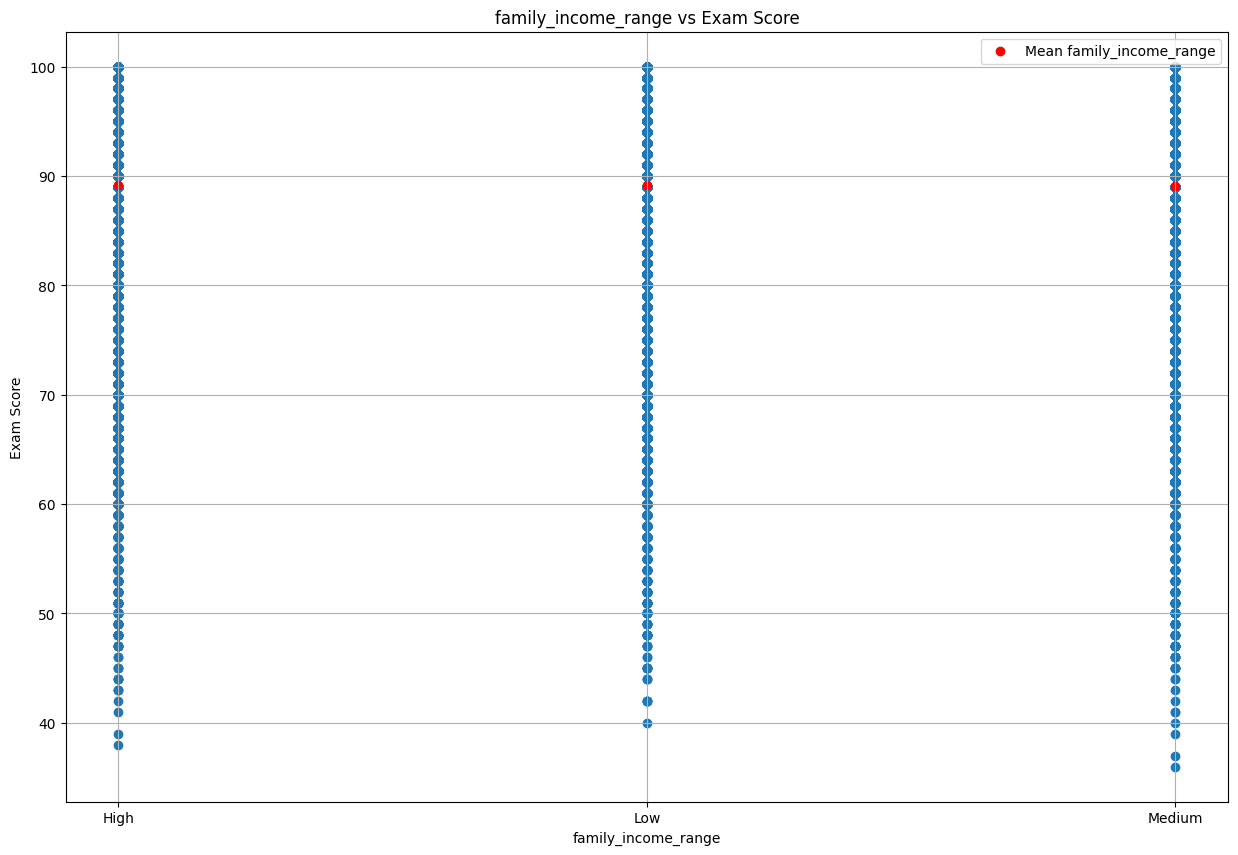

In [10]:
df_column = 'family_income_range'

data['study_hours_per_day'] = pd.cut(data.study_hours_per_day, bins=10, labels=np.arange(10))


plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Cutted Attendance Percentage

/tmp/ipython-input-11-2181281493.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(by=df_column).exam_score.mean().copy()


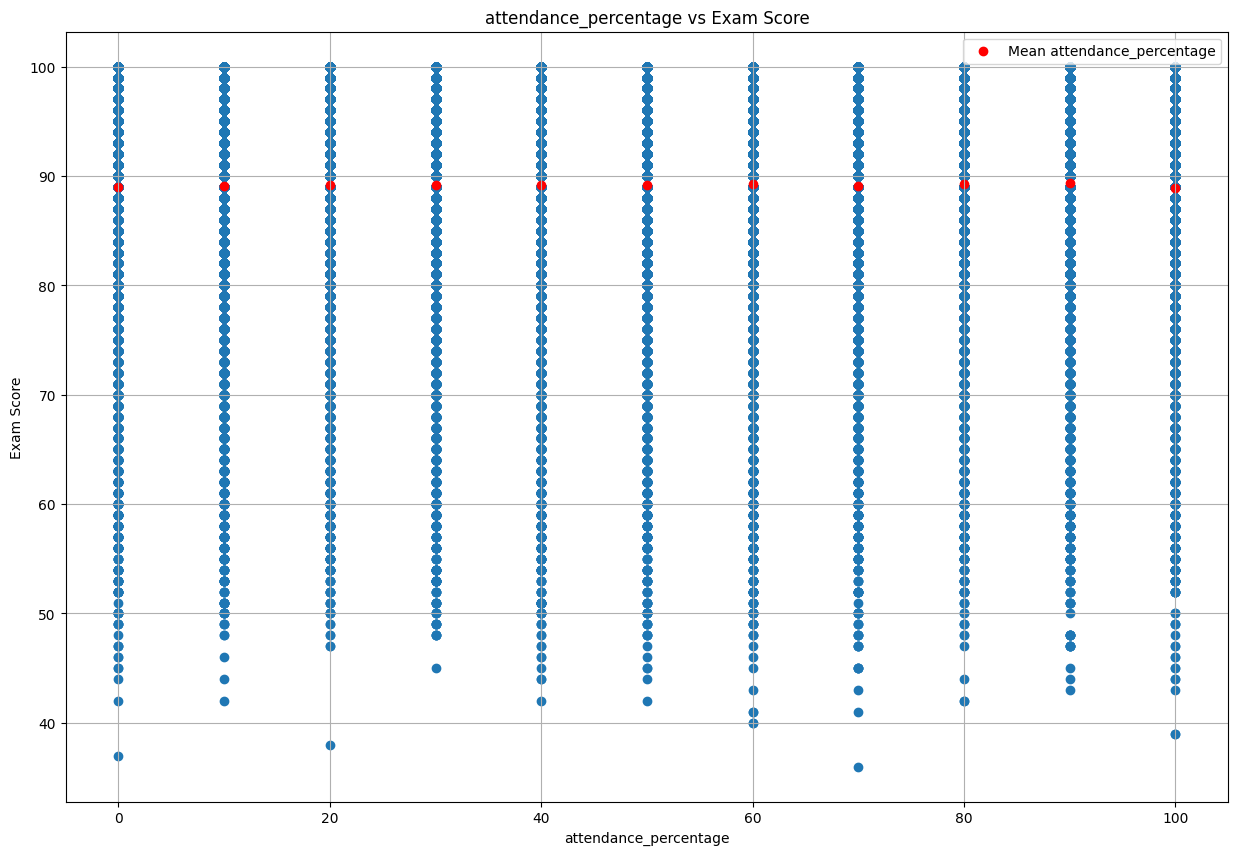

In [11]:
df_column = 'attendance_percentage'

data.attendance_percentage = pd.cut(data.attendance_percentage, bins=11, labels=np.linspace(0, 100, 11))

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

# Preprocessing

## Scaling Data

In [12]:
# data.info()

X = data.drop('exam_score', axis=1)
y = data.exam_score

categorical_data = X.loc[:, (X.dtypes=='object') | (X.dtypes=='category')] #Getting categorical data to preprocess
# print(categorical_data.nunique())

# Separeting categorical and numerical data column names

cat_columns = categorical_data.columns
num_columns = X.drop(cat_columns, axis=1).columns

# print(cat_columns, num_columns)

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(with_mean=False), num_columns),
                  ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns)])

processor = preprocessor.fit(X)
# print(processor.get_feature_names_out())

X = processor.transform(X)
X = pd.DataFrame(X, columns=processor.get_feature_names_out())
X.head()

,num__student_id,num__age,num__social_media_hours,num__netflix_hours,num__sleep_hours,num__exercise_frequency,num__mental_health_rating,num__previous_gpa,num__semester,num__stress_level,...,cat__study_environment_Co-Learning Group,cat__study_environment_Dorm,cat__study_environment_Library,cat__study_environment_Quiet Room,cat__access_to_tutoring_Yes,cat__family_income_range_Low,cat__family_income_range_Medium,cat__learning_style_Kinesthetic,cat__learning_style_Reading,cat__learning_style_Visual
0,4.330127,6.941577,2.075503,0.086506,4.225254,1.309152,3.122451,8.641685,2.178366,2.969545,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4.330170,7.475544,0.345917,0.346025,4.906746,1.745535,3.538778,8.641685,3.049713,2.969545,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,4.330214,4.538723,2.905705,0.605544,6.269731,1.745535,2.966328,8.187997,1.742693,4.095924,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4.330257,7.208561,3.182439,1.989646,2.862269,1.309152,4.423472,8.641685,2.614040,2.355156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,4.330300,6.674593,0.553468,2.335671,4.429701,2.618303,4.787758,8.641685,1.742693,2.918346,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


## Feature Selection

### Filter Methods

#### Information Gain

In [13]:
most_frequent_features = pd.DataFrame()

info_gain = mutual_info_classif(X, y, random_state=8)
info_gain = pd.Series(info_gain, index=X.columns)
most_frequent_features['info_gain'] = info_gain.sort_values(ascending=False)[:10].index

Feature | Score
--|--
num__previous_gpa	|0.815010
num__motivation_level|	0.037841
num__exam_anxiety_score|	0.036058
num__screen_time	|0.011716
cat__access_to_tutoring_Yes|	0.011060
cat__study_hours_per_day_6	|0.009533
cat__study_environment_Dorm	|0.008186
cat__study_hours_per_day_7	|0.007945
cat__major_Computer Science	|0.006965
cat__attendance_percentage_60.0|	0.006619

#### Chi² Test

In [14]:
chi2_test = chi2(X, y)
chi2_test = pd.Series(chi2_test[0], index=X.columns)

most_frequent_features['chi2'] = chi2_test.sort_values(ascending=False)[:10].index

Feature | Score
--|--
num__previous_gpa|	9008.028342
num__motivation_level|	2665.566641
cat__study_environment_Dorm|	1659.037957
cat__dropout_risk_Yes	|988.034383
num__exam_anxiety_score|	952.638377
cat__study_hours_per_day_1|	894.338553
cat__study_hours_per_day_6|	708.661702
num__screen_time	|689.971791
cat__study_hours_per_day_5|	674.933582
cat__access_to_tutoring_Yes|	624.929890

#### Fisher's Score

In [15]:
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
fisher_score = pd.Series(selector.scores_, index=X.columns)

most_frequent_features['fisher'] = fisher_score.sort_values(ascending=False)[:10].index

Feature| Score
--|--
num__previous_gpa|	8851.715627
num__motivation_level|	85.071872
num__exam_anxiety_score|	74.654550
num__screen_time|	38.628814
cat__study_environment_Dorm|	33.301947
cat__access_to_tutoring_Yes	|19.803275
num__stress_level	|19.617703
cat__study_hours_per_day_1|	16.145879
cat__dropout_risk_Yes|	15.937493
cat__study_hours_per_day_5|	11.900960

#### Correlation Coefficient

In [16]:
corr_matrix = X.corrwith(y).abs()

most_frequent_features['corr'] = corr_matrix.sort_values(ascending=False)[:10].index

Feature | Score
--|--
num__previous_gpa|	0.932940
num__motivation_level|	0.250287
num__exam_anxiety_score|	0.235909
num__screen_time	|0.169788
cat__study_environment_Dorm|	0.152248
cat__access_to_tutoring_Yes|	0.120398
num__stress_level	|0.118550
cat__study_hours_per_day_1|	0.103642
cat__study_hours_per_day_5|	0.095539
cat__study_hours_per_day_6|	0.094736

#### Variance Threshold

In [17]:
variance_selector = VarianceThreshold(threshold=0.05)
variance_selector.fit(X)
variance_score = pd.Series(variance_selector.variances_, index=X.columns)

most_frequent_features['variance'] = variance_score.sort_values(ascending=False)[:10].index

#### Final Results

In [18]:
selected_features = most_frequent_features.mode(axis=1)[0].unique()
X = X[selected_features]
selected_features

array(['num__previous_gpa', 'num__motivation_level',
       'num__exam_anxiety_score', 'num__screen_time',
       'cat__study_environment_Dorm', 'cat__access_to_tutoring_Yes',
       'num__stress_level', 'cat__study_hours_per_day_1',
       'cat__study_hours_per_day_5'], dtype=object)

Place | info_gain|	chi2|	fisher|	corr|	variance
-- | -- |-- |-- |-- |-- |
1 | num__previous_gpa| num__previous_gpa|	num__previous_gpa	|num__previous_gpa|	num__age
2|	num__motivation_level|	num__motivation_level|	num__motivation_level|	num__motivation_level|	num__time_management_score
3	|num__exam_anxiety_score|	cat__study_environment_Dorm|	num__exam_anxiety_score|	num__exam_anxiety_score|	num__screen_time
4|	cat__study_environment_Dorm|	cat__dropout_risk_Yes|	num__screen_time|	num__screen_time|	num__parental_support_level
5	|num__screen_time|	num__exam_anxiety_score|	cat__study_environment_Dorm|	cat__study_environment_Dorm|	num__social_media_hours
6	|cat__dropout_risk_Yes|	cat__study_hours_per_day_1|	cat__access_to_tutoring_Yes|	cat__access_to_tutoring_Yes|	num__motivation_level
7|	cat__study_hours_per_day_5|	cat__study_hours_per_day_6|	num__stress_level|	num__stress_level|	num__previous_gpa
8|	cat__access_to_tutoring_Yes|	num__screen_time|	cat__study_hours_per_day_1|	cat__study_hours_per_day_1|	num__stress_level
9|	cat__family_income_range_Low|	cat__study_hours_per_day_5|	cat__dropout_risk_Yes|	cat__study_hours_per_day_5|	num__student_id|
10|	cat__attendance_percentage_70.0|	cat__access_to_tutoring_Yes|	cat__study_hours_per_day_5|	cat__study_hours_per_day_6|	num__netflix_hours


# Model Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

search_space = [{'regr': [LinearRegression()], 'regr__fit_intercept': [True, False]},
                {'regr': [SGDRegressor(random_state=8)], 'regr__loss': ['squared_error', 'huber', 'epsilon_insensitive'], 'regr__penalty': ['l2', 'l1', 'elasticnet']},
                {'regr': [Lasso(random_state=8)], 'regr__alpha': [x for x in np.linspace(0, 1, 10)], 'regr__fit_intercept': [True, False]},
                {'regr': [Ridge(random_state=8)], 'regr__alpha': [x for x in np.linspace(0, 1, 10)], 'regr__fit_intercept': [True, False]},
                {'regr': [SVR()], 'regr__C': [x for x in np.linspace(0, 1, 10)], 'regr__epsilon': [x for x in np.linspace(0, 1, 10)]}
                ]


preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(with_mean=False), num_columns),
                  ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns)])



preliminar_pipeline = Pipeline([('regr', LinearRegression())])

cv = GridSearchCV(estimator=preliminar_pipeline,
                  param_grid=search_space,
                  cv=5,
                  scoring='neg_mean_squared_error')
cv.fit(X_train, y_train)
cv.cv_results_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.446e+05, tolerance: 6.934e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [ ]:
cv.best_estimator_

In [ ]:
cv.best_params_

In [ ]:
cv.best_score_

In [ ]:
cv.cv_results_